In [73]:
import pandas as pd
import numpy as np
from sktime.datatypes import check_is_mtype


In [74]:
# Load the dataset
X_train = pandas.read_csv('Datasets/VanilaDataset/X-Y Splitted Data/X_train.csv')
y_train = pandas.read_csv('Datasets/VanilaDataset/X-Y Splitted Data/y_train.csv')
X_test = pandas.read_csv('Datasets/VanilaDataset/X-Y Splitted Data/X_test.csv')
y_test = pandas.read_csv('Datasets/VanilaDataset/X-Y Splitted Data/y_test.csv')

# 1st column in these dataets are the level 1 index , and the 2nd column is the level 2 index , set them as such
X_train = X_train.set_index(['Instance', 'Time'])   
X_test = X_test.set_index(['Instance', 'Time'])  
y_train = y_train.set_index(['Instance'])  
y_test = y_test.set_index(['Instance'])  

In [75]:
check_is_mtype(X_train, mtype="pd-multiindex", return_metadata=True)

(True,
 None,
 {'is_univariate': False,
  'is_empty': False,
  'has_nans': False,
  'n_features': 6,
  'feature_names': ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'],
  'dtypekind_dfip': [<DtypeKind.FLOAT: 2>,
   <DtypeKind.FLOAT: 2>,
   <DtypeKind.FLOAT: 2>,
   <DtypeKind.FLOAT: 2>,
   <DtypeKind.FLOAT: 2>,
   <DtypeKind.FLOAT: 2>],
  'feature_kind': [<DtypeKind.FLOAT: 2>,
   <DtypeKind.FLOAT: 2>,
   <DtypeKind.FLOAT: 2>,
   <DtypeKind.FLOAT: 2>,
   <DtypeKind.FLOAT: 2>,
   <DtypeKind.FLOAT: 2>],
  'n_instances': 2155,
  'is_one_series': False,
  'is_equal_length': False,
  'is_equally_spaced': True,
  'n_panels': 1,
  'is_one_panel': True,
  'mtype': 'pd-multiindex',
  'scitype': 'Panel'})

In [41]:
from sktime.classification.kernel_based import RocketClassifier
from sktime.transformations.panel.padder import PaddingTransformer
from sktime.datasets import load_unit_test
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

my_padded_multi_rocket = PaddingTransformer() * RocketClassifier(rocket_transform='multirocket')
my_padded_multi_rocket.fit(X_train, y_train)
y_pred_multi = my_padded_multi_rocket.predict(X_test) 

# calculate the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_multi)
print(f"Accuracy: {accuracy:.2f}")



Accuracy: 0.66


NameError: name 'pattern_encoding' is not defined

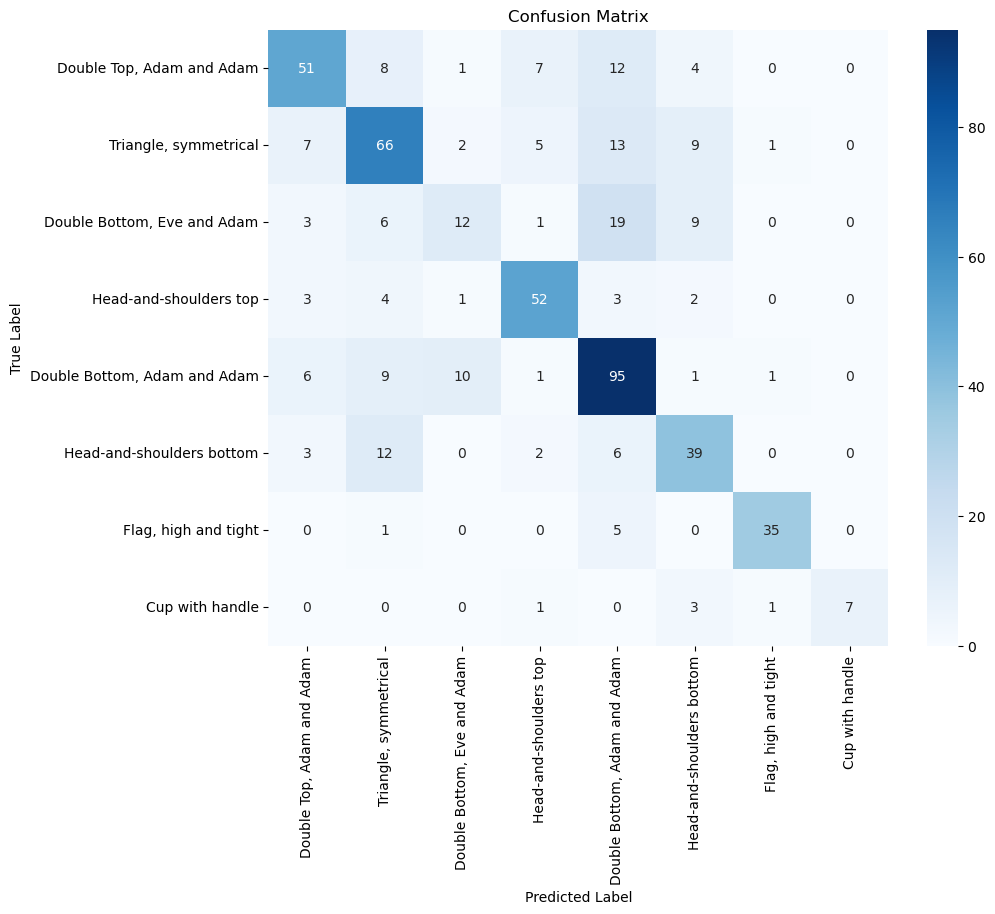

In [44]:
def conf_mat_draw(y_test , y_pred_multi):
    # Create the confusion matrix
    cm3 = confusion_matrix(y_test, y_pred_multi)

    # Create a DataFrame from the confusion matrix
    cm_df3 = pd.DataFrame(cm3, index=pattern_encoding.keys(), columns=pattern_encoding.keys())

    # Create the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_df3, annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

pattern_encoding = {'Double Top, Adam and Adam': 0, 'Triangle, symmetrical': 1, 'Double Bottom, Eve and Adam': 2, 'Head-and-shoulders top': 3, 'Double Bottom, Adam and Adam': 4, 'Head-and-shoulders bottom': 5, 'Flag, high and tight': 6, 'Cup with handle': 7}

conf_mat_draw(y_test , y_pred_multi)

In [27]:
from sktime.registry import all_estimators
all_estimators("transformer", filter_tags={"capability:unequal_length": True}) 

[('Aggregator', sktime.transformations.hierarchical.aggregate.Aggregator),
 ('AnnotatorAsTransformer',
  sktime.annotation.compose._as_transform.AnnotatorAsTransformer),
 ('AutoCorrelationTransformer',
  sktime.transformations.series.acf.AutoCorrelationTransformer),
 ('BKFilter', sktime.transformations.series.bkfilter.BKFilter),
 ('Bollinger', sktime.transformations.series.bollinger.Bollinger),
 ('BoxCoxTransformer', sktime.transformations.series.boxcox.BoxCoxTransformer),
 ('CFFilter', sktime.transformations.series.cffilter.CFFilter),
 ('Catch22', sktime.transformations.panel.catch22.Catch22),
 ('Catch22Wrapper',
  sktime.transformations.panel.catch22wrapper.Catch22Wrapper),
 ('ClaSPTransformer', sktime.transformations.series.clasp.ClaSPTransformer),
 ('ClustererAsTransformer',
  sktime.clustering.compose._as_transform.ClustererAsTransformer),
 ('ColumnConcatenator',
  sktime.transformations.panel.compose.ColumnConcatenator),
 ('ColumnEnsembleTransformer',
  sktime.transformations.com

In [127]:
def df_format_for_ts_transforms(df):
    # get the index names of level 0 
    index_names = df.index.names
    print(index_names)
    
    # Group by 'Level 0' and apply list aggregation
    result = df.groupby(level=index_names[0]).agg(lambda x: list(x.values))

    # Convert each list value in each index of result dataframe to a pandas.core.series.Series
    result = result.applymap(lambda x: pd.Series(x))

    print("\nModified DataFrame with Series-like cells")
    return result



In [126]:
X_train = df_format_for_ts_transforms(X_train)
X_test = df_format_for_ts_transforms(X_test)

['Instance', 'Time']


C:\Users\gwiku\AppData\Local\Temp\ipykernel_41572\1358096812.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  result = result.applymap(lambda x: pd.Series(x))



Modified DataFrame with Series-like cells:
['Instance', 'Time']

Modified DataFrame with Series-like cells:


In [128]:
X_train

,Open,High,Low,Close,Adj Close,Volume
Instance,,,,,,
0,0 105.629997 1 102.750000 2 103.88999...,0 105.709999 1 103.669998 2 104.70999...,0 102.529999 1 100.820000 2 102.59999...,0 103.019997 1 101.650002 2 103.33000...,0 98.521034 1 97.210861 2 98.81749...,0 959000.0 1 886300.0 2 769900.0 3 ...
1,0 291.940002 1 282.519989 2 285.66000...,0 294.609985 1 286.220001 2 289.45999...,0 279.279999 1 280.859985 2 283.60998...,0 282.700012 1 284.489990 2 287.50000...,0 282.700012 1 284.489990 2 287.50000...,0 627500.0 1 323300.0 2 260900.0 3 ...
2,0 8.350 1 8.465 2 9.010 3 9.32...,0 8.520 1 8.910 2 9.250 3 9.49...,0 8.120 1 8.465 2 8.919 3 9.05...,0 8.51 1 8.86 2 9.24 3 9.06 4 ...,0 8.51 1 8.86 2 9.24 3 9.06 4 ...,0 2498300.0 1 3880400.0 2 3576900....
3,0 110.120003 1 108.370003 2 107.26...,0 110.370003 1 109.309998 2 108.32...,0 107.459999 1 107.400002 2 106.04...,0 108.309998 1 107.940002 2 106.38...,0 102.362328 1 102.012634 2 100.54...,0 321500.0 1 264700.0 2 154300.0 3...
4,0 1.55 1 1.51 2 1.26 3 1.35 4 ...,0 1.5700 1 1.5600 2 1.3600 3 1...,0 1.380 1 1.380 2 1.150 3 1.21...,0 1.50 1 1.41 2 1.30 3 1.42 4 ...,0 1.50 1 1.41 2 1.30 3 1.42 4 ...,0 24320886.0 1 19294192.0 2 286792...
...,...,...,...,...,...,...
2150,0 83.669998 1 85.360001 2 84.20999...,0 85.250000 1 85.470001 2 84.87999...,0 83.669998 1 83.209999 2 82.91999...,0 85.089996 1 83.550003 2 84.86000...,0 83.005165 1 81.502899 2 82.78080...,0 1224600.0 1 2365400.0 2 2145600....
2151,0 28.250000 1 27.490000 2 26.71999...,0 28.650000 1 27.790001 2 27.25000...,0 27.709999 1 26.770000 2 26.20000...,0 27.709999 1 27.230000 2 26.63999...,0 27.275879 1 26.803398 2 26.22264...,0 144500.0 1 88700.0 2 82500.0 3...
2152,0 101.110001 1 103.339996 2 101.50000...,0 103.040001 1 103.339996 2 102.29000...,0 101.080002 1 100.709999 2 100.05000...,0 102.949997 1 101.330002 2 101.55999...,0 102.949997 1 101.330002 2 101.55999...,0 89300.0 1 80800.0 2 187200.0 3 ...


In [130]:
from sktime.transformations.panel.rocket import MiniRocketMultivariate

trf = MiniRocketMultivariate(num_kernels=512) 
trf.fit(X_train) 
X_train_r = trf.transform(X_train) 

ValueError: all input arrays must have the same shape

In [115]:
trf.fit(result) 
result_r = trf.transform(result) 

In [83]:
type(X_train_['dim_0'][0])

pandas.core.series.Series

In [101]:
X_train_

,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5
0,0 0.079106 1 0.079106 2 -0.903497 3...,0 0.394032 1 0.394032 2 -3.666397 3...,0 0.551444 1 0.551444 2 -0.282844 3...,0 0.351565 1 0.351565 2 -0.095881 3...,0 0.023970 1 0.023970 2 -0.319605 3...,0 0.633883 1 0.633883 2 0.972131 3...
1,0 0.377751 1 0.377751 2 2.952965 3...,0 -0.610850 1 -0.610850 2 0.970717 3...,0 -0.147376 1 -0.147376 2 -5.962515 3...,0 -0.103872 1 -0.103872 2 -7.593275 3...,0 -0.109198 1 -0.109198 2 -0.697804 3...,0 -0.037287 1 -0.037287 2 -2.865789 3...
2,0 -0.813905 1 -0.813905 2 -0.424628 3...,0 0.825666 1 0.825666 2 -1.305033 3...,0 0.032712 1 0.032712 2 0.826170 3...,0 0.021307 1 0.021307 2 -0.372872 3...,0 0.122515 1 0.122515 2 -0.045277 3...,0 0.775041 1 0.775041 2 0.383526 3...
3,0 0.289855 1 0.289855 2 -0.669185 3...,0 0.284130 1 0.284130 2 -0.210466 3...,0 0.213680 1 0.213680 2 0.252267 3...,0 -0.314278 1 -0.314278 2 0.018644 3...,0 0.074574 1 0.074574 2 0.007990 3...,0 -0.079901 1 -0.079901 2 0.237040 3...
4,0 -0.123238 1 -0.123238 2 -0.249547 3...,0 0.379341 1 0.379341 2 0.541501 3...,0 -0.286006 1 -0.286006 2 0.208420 3...,0 -0.098545 1 -0.098545 2 -0.023970 3...,0 0.058594 1 0.058594 2 0.175783 3...,0 -0.074574 1 -0.074574 2 0.114525 3...
5,0 -0.357300 1 -0.357300 2 -0.005055 3...,0 -0.584885 1 -0.584885 2 0.295037 3...,0 -0.792751 1 -0.792751 2 0.213664 3...,0 0.074574 1 0.074574 2 -0.157139 3...,0 0.159802 1 0.159802 2 -0.306288 3...,0 0.023970 1 0.023970 2 1.230478 3...
6,0 1.236069 1 1.236069 2 0.118106 3...,0 -0.569532 1 -0.569532 2 0.264725 3...,0 1.536733 1 1.536733 2 0.712643 3...,0 0.143822 1 0.143822 2 -2.018837 3...,0 0.061258 1 0.061258 2 -0.111862 3...,0 0.905547 1 0.905547 2 -0.990775 3...
7,0 -0.366403 1 -0.366403 2 0.126830 3...,0 0.331289 1 0.331289 2 1.060159 3...,0 -0.817845 1 -0.817845 2 0.285714 3...,0 -0.167792 1 -0.167792 2 0.170456 3...,0 -0.093218 1 -0.093218 2 -0.117188 3...,0 0.157139 1 0.157139 2 0.719111 3...
8,0 -0.342233 1 -0.342233 2 -0.298542 3...,0 0.327415 1 0.327415 2 -0.527154 3...,0 0.157229 1 0.157229 2 0.248585 3...,0 0.394179 1 0.394179 2 -0.037287 3...,0 0.074574 1 0.074574 2 -0.087891 3...,0 -0.037287 1 -0.037287 2 -0.050604 3...
9,0 -0.407421 1 -0.407421 2 2.355158 3...,0 1.413374 1 1.413374 2 -3.928032 3...,0 0.092782 1 0.092782 2 -0.211622 3...,0 -0.066584 1 -0.066584 2 -3.630177 3...,0 0.223723 1 0.223723 2 -0.026634 3...,0 0.135832 1 0.135832 2 -1.946925 3...


In [66]:
# print the vale in the 1st row and 1st column of the X_train dataset
X_train_.iloc[0, 0]

0     0.079106
1     0.079106
2    -0.903497
3     1.116125
4     1.638200
        ...   
95   -0.167918
96   -0.227670
97   -0.193271
98   -0.193271
99   -0.205150
Length: 100, dtype: float64

In [62]:
#  print what are the data types of the values in the X_train dataset
print(X_train_.dtypes)

dim_0    object
dim_1    object
dim_2    object
dim_3    object
dim_4    object
dim_5    object
dtype: object
